In [1]:
# Starter code

from pyspark.sql import SparkSession

#os.environ['PYSPARK_PYTHON'] = "./pyspark_venv/bin/python"
# Create spark session
spark = SparkSession \
    .builder \
    .appName("Sparkify") \
    .getOrCreate()

#    .config( \
#    "spark.archives",  \
#    "pyspark_venv.tar.gz#environment") \

# Read in full sparkify dataset
event_data = "./mini_sparkify_event_data.json"
df = spark.read.json(event_data)
df.persist()
df.createOrReplaceTempView('df')
df.head()

Row(artist='Martha Tilston', auth='Logged In', firstName='Colin', gender='M', itemInSession=50, lastName='Freeman', length=277.89016, level='paid', location='Bakersfield, CA', method='PUT', page='NextSong', registration=1538173362000, sessionId=29, song='Rockpools', status=200, ts=1538352117000, userAgent='Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', userId='30')

In [63]:
from datetime import datetime
import user_agents 
from pyspark.sql.types import IntegerType
import matplotlib as plt
import seaborn as sns

In [3]:
df.limit(10).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
5,The All-American Rejects,Logged In,Micah,M,81,Long,208.29995,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Don't Leave Me,200,1538352678000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
6,The Velvet Underground / Nico,Logged In,Micah,M,82,Long,260.46649,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Run Run Run,200,1538352886000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
7,Starflyer 59,Logged In,Colin,M,53,Freeman,185.44281,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Passengers (Old Album Version),200,1538352899000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
8,None,Logged In,Colin,M,54,Freeman,NaN,paid,"Bakersfield, CA",PUT,Add to Playlist,1538173362000,29,None,200,1538352905000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
9,Frumpies,Logged In,Colin,M,55,Freeman,134.47791,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Fuck Kitty,200,1538353084000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


In [4]:
spark.sql('''
select count(*), page 
from df
group by page
order by count(*) desc
''').toPandas()

,count(1),page
0,228108,NextSong
1,14457,Home
2,12551,Thumbs Up
3,6526,Add to Playlist
4,4277,Add Friend
5,3933,Roll Advert
6,3241,Login
7,3226,Logout
8,2546,Thumbs Down
9,2055,Downgrade


In [5]:
spark.sql('''
select level, count(*)
from df
group by level
''').toPandas()

,level,count(1)
0,free,58338
1,paid,228162


In [6]:
spark.sql('''
select count(distinct userId)
from df
''').toPandas()

,count(DISTINCT userId)
0,226


In [7]:
spark.sql('''
select min(ts), max(ts)
from df
''').toPandas()

,min(ts),max(ts)
0,1538352117000,1543799476000


In [8]:
spark.sql('''
select *
from df
where userId = 30
order by sessionId, itemInSession
''').toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
2,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Starflyer 59,Logged In,Colin,M,53,Freeman,185.44281,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Passengers (Old Album Version),200,1538352899000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
4,None,Logged In,Colin,M,54,Freeman,NaN,paid,"Bakersfield, CA",PUT,Add to Playlist,1538173362000,29,None,200,1538352905000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,Enigma,Logged In,Colin,M,311,Freeman,303.38567,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,2401,Mea Culpa,200,1543621509000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1771,Alanis Morissette,Logged In,Colin,M,312,Freeman,236.45995,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,2401,Ironic (Acoustic Album Version),200,1543621812000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1772,Dwight Yoakam,Logged In,Colin,M,313,Freeman,239.30730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,2401,You're The One,200,1543622048000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1773,Golden Triangle,Logged In,Colin,M,314,Freeman,175.77751,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,2401,Red Coats,200,1543622287000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


In [9]:
spark.sql('''
select *
from df
where 1=1 
--and page IN ('Downgrade')
and userId = 2
and sessionId = 1
and page != 'NextSong'
order by sessionId, itemInSession
''').limit(10).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,None,Logged In,Natalee,F,10,Charles,NaN,paid,"Raleigh, NC",GET,Home,1536799770000,1,None,200,1538976114000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
1,None,Logged In,Natalee,F,13,Charles,NaN,paid,"Raleigh, NC",PUT,Logout,1536799770000,1,None,307,1538976606000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
2,None,Logged In,Natalee,F,16,Charles,NaN,paid,"Raleigh, NC",GET,Home,1536799770000,1,None,200,1538976813000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
3,None,Logged In,Natalee,F,17,Charles,NaN,paid,"Raleigh, NC",GET,Home,1536799770000,1,None,200,1538976832000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
4,None,Logged In,Natalee,F,19,Charles,NaN,paid,"Raleigh, NC",GET,Downgrade,1536799770000,1,None,200,1538976932000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
5,None,Logged In,Natalee,F,38,Charles,NaN,paid,"Raleigh, NC",PUT,Thumbs Up,1536799770000,1,None,307,1538981760000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
6,None,Logged In,Natalee,F,40,Charles,NaN,paid,"Raleigh, NC",PUT,Thumbs Down,1536799770000,1,None,307,1538982047000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
7,None,Logged In,Natalee,F,44,Charles,NaN,paid,"Raleigh, NC",PUT,Thumbs Down,1536799770000,1,None,307,1538982662000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
8,None,Logged In,Natalee,F,49,Charles,NaN,paid,"Raleigh, NC",PUT,Thumbs Up,1536799770000,1,None,307,1538983701000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2
9,None,Logged In,Natalee,F,59,Charles,NaN,paid,"Raleigh, NC",PUT,Thumbs Up,1536799770000,1,None,307,1538986786000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",2


In [10]:
spark.sql('''
    WITH surrounding_page AS (
    select row_number() over user_sessions as row_number
        , LAG(page, 2) over user_sessions as before_before_page
        , LAG(level, 2) over user_sessions as before_before_level
        , LAG(page, 1) over user_sessions as before_page
        , LAG(level, 1) over user_sessions as before_level
        , LEAD(page, 1) over user_sessions as after_page
        , LEAD(level, 1) over user_sessions as after_level
        , LEAD(page, 2) over user_sessions as after_after_page
        , LEAD(level, 2) over user_sessions as after_after_level
        , df.*
    from df
    where 1=1 
    --and page IN ('Submit Downgrade')
    --and userId = 2
    --and sessionId = 1
    --and page != 'NextSong'
    window user_sessions as (partition by userId order by sessionId, itemInSession)
    
)

select count(*)
    , before_before_page
    , before_before_level
    , before_page
    , before_level
    , page
    , level
    , after_page
    , after_level
    , after_after_page
    , after_after_level
from surrounding_page 
where page IN (
--'Submit Downgrade'
--'Cancellation Confirmation'
'Cancel'
)
group by before_before_page
    , before_before_level
    , before_page
    , before_level
    , page
    , level
    , after_page
    , after_level
    , after_after_page
    , after_after_level
order by count(*) desc
''').limit(20).toPandas()

,count(1),before_before_page,before_before_level,before_page,before_level,page,level,after_page,after_level,after_after_page,after_after_level
0,18,NextSong,paid,Downgrade,paid,Cancel,paid,Cancellation Confirmation,paid,None,None
1,11,NextSong,free,Roll Advert,free,Cancel,free,Cancellation Confirmation,free,None,None
2,6,NextSong,paid,Settings,paid,Cancel,paid,Cancellation Confirmation,paid,None,None
3,4,NextSong,free,Settings,free,Cancel,free,Cancellation Confirmation,free,None,None
4,3,NextSong,free,Thumbs Down,free,Cancel,free,Cancellation Confirmation,free,None,None
5,3,NextSong,paid,Roll Advert,paid,Cancel,paid,Cancellation Confirmation,paid,None,None
6,2,Help,free,Settings,free,Cancel,free,Cancellation Confirmation,free,None,None
7,2,Downgrade,paid,Downgrade,paid,Cancel,paid,Cancellation Confirmation,paid,None,None
8,1,Home,paid,Settings,paid,Cancel,paid,Cancellation Confirmation,paid,None,None
9,1,NextSong,paid,Thumbs Down,paid,Cancel,paid,Cancellation Confirmation,paid,None,None


In [11]:
spark.sql('''
select userId, count(*)
from df
where 1=1 
and page IN ('Submit Downgrade')
group by userId
order by count(*) desc
--and userId = 2
--and sessionId = 1
--and page != 'NextSong'
--order by sessionId, itemInSession
''').limit(10).toPandas()

,userId,count(1)
0,140,3
1,39,3
2,85,2
3,35,2
4,131,2
5,13,2
6,61,2
7,20,2
8,100004,2
9,100018,2


In [12]:
spark.sql('''
select *
from df
where 1=1 
and page IN ('Submit Downgrade')
and userId = 140
--and sessionId = 1
--and page != 'NextSong'
--order by sessionId, itemInSession
''').limit(10).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,None,Logged In,Lucero,F,19,Reed,NaN,paid,"Louisville/Jefferson County, KY-IN",PUT,Submit Downgrade,1536642109000,753,None,307,1539337383000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
1,None,Logged In,Lucero,F,163,Reed,NaN,paid,"Louisville/Jefferson County, KY-IN",PUT,Submit Downgrade,1536642109000,1643,None,307,1541523845000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
2,None,Logged In,Lucero,F,229,Reed,NaN,paid,"Louisville/Jefferson County, KY-IN",PUT,Submit Downgrade,1536642109000,1918,None,307,1542290890000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140


In [13]:
spark.sql('''
select *
from df
where 1=1 
--and page IN ('Submit Downgrade')
and userId = 140
and sessionId = 1643
and itemInSession between 153 and 170
--and page != 'NextSong'
order by sessionId, itemInSession
''').limit(20).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Tab Benoit,Logged In,Lucero,F,153,Reed,221.09995,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Jambalaya,200,1541521791000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
1,Jet Set Satellite,Logged In,Lucero,F,154,Reed,144.24771,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Baby_ Cool Your Jets,200,1541522012000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
2,The Strokes,Logged In,Lucero,F,155,Reed,193.38404,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Last Nite,200,1541522156000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
3,Aesop Rock,Logged In,Lucero,F,156,Reed,247.71873,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Catacomb Kids,200,1541522349000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
4,Iron Maiden,Logged In,Lucero,F,157,Reed,410.90567,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,These Colours Don't Run,200,1541522596000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
5,Turbonegro,Logged In,Lucero,F,158,Reed,271.54240,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Sell Your Body (To The Night),200,1541523006000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
6,The Aggrolites,Logged In,Lucero,F,159,Reed,171.02322,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Thunder Fist (Album Version),200,1541523277000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
7,BjÃÂ¶rk,Logged In,Lucero,F,160,Reed,348.57751,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Undo,200,1541523448000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
8,Rammstein,Logged In,Lucero,F,161,Reed,272.40444,paid,"Louisville/Jefferson County, KY-IN",PUT,NextSong,1536642109000,1643,Sonne,200,1541523796000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140
9,None,Logged In,Lucero,F,162,Reed,NaN,paid,"Louisville/Jefferson County, KY-IN",GET,Downgrade,1536642109000,1643,None,200,1541523844000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",140


In [22]:
spark.sql('''
select userAgent, count(*)
from df
where 1=1 
group by userAgent
order by count(*) desc
''').limit(20).collect()

[Row(userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', count(1)=22751),
 Row(userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.77.4 (KHTML, like Gecko) Version/7.0.5 Safari/537.77.4"', count(1)=19611),
 Row(userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', count(1)=18448),
 Row(userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', count(1)=17348),
 Row(userAgent='Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', count(1)=16700),
 Row(userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', count(1)=15395),
 Row(userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36"

In [34]:
result = parse("Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36").browser.family
type(result)

str

In [71]:
spark.udf.register("get_hour", lambda x: int(datetime.utcfromtimestamp(x / 1000.0).hour), IntegerType())
spark.udf.register("get_day_of_month", lambda x: int(datetime.utcfromtimestamp(x / 1000.0).day), IntegerType())

<function __main__.<lambda>(x)>

In [48]:
spark.udf.register("browser_from_agent", lambda x: user_agents.parse(x).browser.family)
spark.udf.register("os_from_agent", lambda x: user_agents.parse(x).os.family)
spark.udf.register("device_from_agent", lambda x: user_agents.parse(x).device.family)
spark.udf.register("mobile_from_agent", lambda x: user_agents.parse(x).is_mobile)
spark.udf.register("tablet_from_agent", lambda x: user_agents.parse(x).is_tablet)
spark.udf.register("pc_from_agent", lambda x: user_agents.parse(x).is_pc)

<function __main__.<lambda>(x)>

In [50]:
spark.sql('''
select count(*)
    , browser_from_agent(userAgent) as browser
    , os_from_agent(userAgent) as os
    , device_from_agent(userAgent) as device
    , mobile_from_agent(userAgent) as mobile
    , tablet_from_agent(userAgent) as tablet
    , pc_from_agent(userAgent) as pc
from df 
where userAgent is not null
group by browser, os, device, mobile, tablet, pc
order by count(*) desc
''').toPandas()

,count(1),browser,os,device,mobile,tablet,pc
0,92301,Chrome,Windows,Other,false,false,true
1,48809,Chrome,Mac OS X,Mac,false,false,true
2,38997,Safari,Mac OS X,Mac,false,false,true
3,36223,Firefox,Windows,Other,false,false,true
4,15347,IE,Windows,Other,false,false,true
5,14943,Firefox,Mac OS X,Mac,false,false,true
6,11381,Mobile Safari,iOS,iPad,false,true,false
7,11192,Mobile Safari,iOS,iPhone,true,false,false
8,4481,Chrome,Linux,Other,false,false,true
9,2544,Firefox,Linux,Other,false,false,true


In [65]:
hourly_usage = spark.sql('''
select get_hour(ts) as hour, count(*) as interaction_count from df
group by hour
order by hour
''').toPandas()

<AxesSubplot:xlabel='hour', ylabel='interaction_count'>

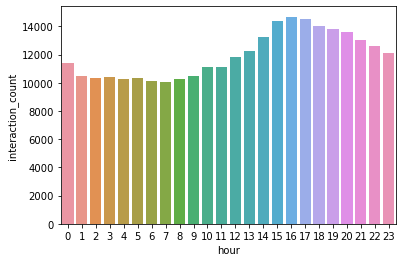

In [70]:
sns.barplot(data=hourly_usage, x="hour", y="interaction_count")

In [82]:
monthly_usage = spark.sql('''
select get_day_of_month(ts) as day, sum(case when page IN('Submit Downgrade', 'Cancellation Confirmation') then 1 else 0 end) as churn, count(*) as interaction_count from df
group by day
order by day
''').toPandas()

In [83]:
monthly_usage

,day,churn,interaction_count
0,1,3,11651
1,2,7,12159
2,3,1,8237
3,4,4,7244
4,5,4,8824
5,6,5,8610
6,7,3,7489
7,8,6,9325
8,9,4,11569
9,10,1,9679


<AxesSubplot:xlabel='day', ylabel='interaction_count'>

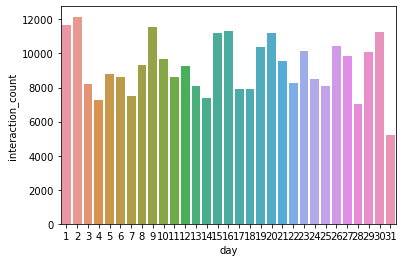

In [128]:
sns.barplot(data=monthly_usage, x="day", y="interaction_count")

In [95]:
dfc = spark.sql('''
with cancel_flagged_df as (
    select df.*
        , case page when 'Cancellation Confirmation' then 1 else 0 end as cancel_event 
        from df
        where userId is not null and sessionId is not null
)

select auth, gender, itemInSession, length, level, page, registration, sessionId, status, ts, userAgent, userId
    , sum(cancel_event) over (partition by userId rows between unbounded preceding and unbounded following) as churn
    from cancel_flagged_df
''')

In [98]:
dfc.persist()
dfc.createOrReplaceTempView('dfc')

In [102]:
spark.sql('''
select churn, count(distinct userId) 
from dfc
group by churn
''').toPandas()

,churn,count(DISTINCT userId)
0,0,174
1,1,52


In [123]:
page_use_by_churn = spark.sql('''
with page_activity as (
    select page, churn, count(*) as interaction_count
    from dfc
    group by page, churn
    order by page, churn
)

select page, churn, interaction_count / sum(interaction_count)  over (partition by churn) * 100 as percent
from page_activity
where page != 'NextSong'
order by page, churn
''').toPandas().pivot(index='page', columns='churn', values='percent')

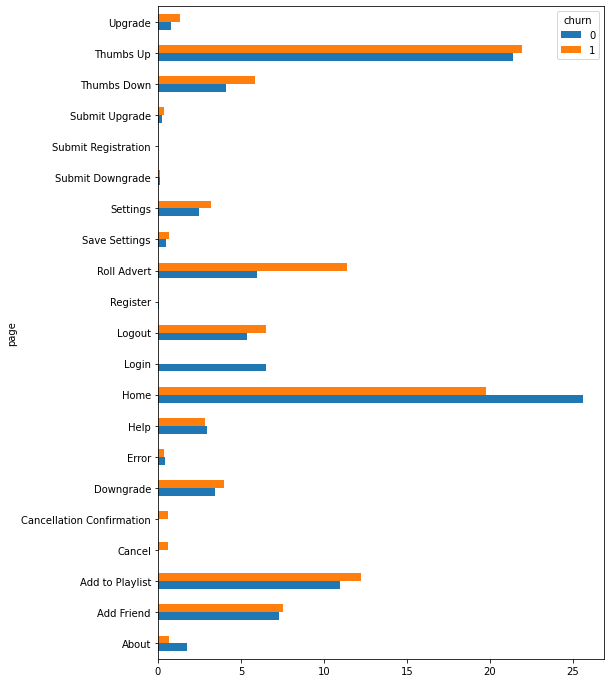

In [126]:
page_use_by_churn.plot.barh(figsize=(8,12));

In [130]:
dfc.printSchema()

root
 |-- auth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- churn: long (nullable = true)



In [141]:
spark.sql('''with user_levels as (
    select userId, churn, sum(case when level = 'free' then 1 else 0 end) as free
    , sum(case when level = 'paid' then 1 else 0 end) as paid, count(*) c
    from dfc
    group by userId,  churn
)

select churn, sum(case when free > 0 then 1 else 0 end) as free_usage
, sum(case when paid > 0 then 1 else 0 end) as paid_usage
, sum(case when paid > 0 and free > 0 then 1 else 0 end) as both
from user_levels
group by churn
''').toPandas()

,churn,free_usage,paid_usage,both
0,0,150,130,106
1,1,46,36,30
